# Multivariate Regression Analysis

Using more than one variable to predict results. 

We need to make sure we are using good variables, otherwise the results can be useless. 

Calculating a best fitting line across multiple dimensions. 

How are we able to tell if an explanatory variable improves a model's predictive power?
- Run a regression with the variable
- Run a new regression without the variable
- Observe how R^2 square changes
- If R^2 is larger with the variable, then the variable improves the model's predictive power

Alternativelt, we can compare the p-values of beta coefficients (the probability that the beta coefficients should have been different). A low p-value is a good thing.  Low p-value means there is a low chance that the beta coefficients are different than estimated. A p-value that is lower than 5% allows us to state: "We can be 95% confident that the beta coefficient we have estimated is different than 0".

Beta coefficients estimated in a multivariate regression can be interpreted as the marginal impact of the explanatory variable. 

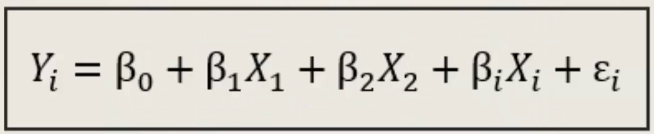

In [2]:
from IPython.display import Image
Image(filename='multivariate regression.png')

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Housing.xlsx')

In [5]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


**Independent Variables**: 
- House Size
- Number of Rooms
- Year of Construction

In [12]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           6.82e-05
Time:                        16:49:05   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Independent Variables**:
- House Size
- Number of Rooms

In [13]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           5.77e-05
Time:                        16:50:19   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Independent Variables**:
- House Size
- Year of Construction

In [14]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.26e-05
Time:                        16:50:26   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Independent Variables**:
- Number of Rooms
- Year of Construction

In [15]:
X = data[['Number of Rooms', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           6.79e-05
Time:                        16:50:30   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""